# Create Eyetracking Heatmap

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# Set the variables

file = 'https://raw.githubusercontent.com/antovich/PyTrackingFinalProject/master/VSTM%20Data%20P18.txt'

stimCol = 'MediaName'

stimName = 'VSTM Green Yellow.jpg'

xCoordCol = 'GazePointX (MCSpx)'

yCoordCol = 'GazePointY (MCSpx)'

stimWidth = 1360

stimHeight = 768

origin = 'upper'

title = stimName

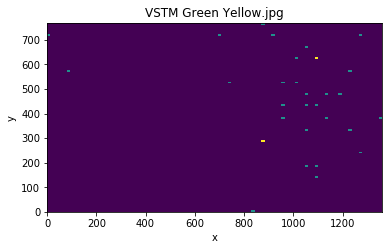

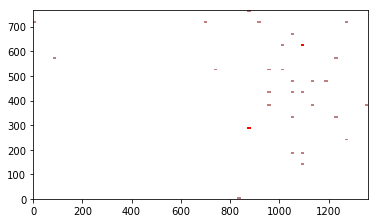

In [149]:
data = eyeTracking.readFile(file=file)

cleaned = eyeTracking.cleanData(data, stimCol, stimName, xCoordCol, yCoordCol)

eyeTracking.drawHeatmap(cleaned, stimWidth, stimHeight)

eyeTracking.transparentHeatmap(heatmap)

In [148]:
class eyeTracking:
    
    def readFile(file):
        filetype = file[-3:]
        if filetype == 'csv':
            data = pd.read_csv(file)
        elif filetype == 'txt':
            data = pd.read_table(file)
        else:
            print('eyeTracking error: unsupported file type, please convert to .csv or .txt')
        return data
    
    def cleanData(data, stimCol, stimName, xCoordCol, yCoordCol):
        # Subset the dataframe for only the specified stimulus
        cleaned = data.ix[data[stimCol] == stimName]
        
        # Remove nulls from columns of interest (leaving only instances with x and y coordinates)
        cleaned = cleaned[cleaned[xCoordCol].notnull()]
        cleaned = cleaned[cleaned[yCoordCol].notnull()]
        
        return cleaned
    
    def drawHeatmap(cleaned, stimWidth, stimHeight, title = stimName, origin = 'upper'):
        # pull the x and y coordinates
        x = cleaned[xCoordCol]
        y = cleaned[yCoordCol]

        # set the size of the plot to the dimensions of the stimulus
        #heatmap, xedges, yedges = np.histogram2d(x, y, bins=(stimWidth,stimHeight))
        #extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        extent = [1, stimWidth, 1, stimHeight]
 
        # Plot heatmap
        plt.clf()
        plt.title(title)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.imshow(heatmap, extent=extent, origin = origin)
        plt.show()
        

    def transparentHeatmap(heatmap):
        img = np.zeros((100,100,4))
        
        img[:,:,0] = heatmap/heatmap.max()
        img[:,:,1] = np.zeros_like(heatmap)
        img[:,:,2] = np.zeros_like(heatmap)
        img[:,:,3] = heatmap/heatmap.max()


        plt.imshow(img, extent=extent, origin='upper')
        #plt.savefig('title.png')
        plt.show()